<a href="https://colab.research.google.com/github/CaioSepulveda/Sales_analyzis/blob/main/SALES_ANALYZIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Carregar o arquivo
df = pd.read_csv('/content/drive/MyDrive/Analise de Dados/Datasets/Sales Dataset.csv')

# Ver as 5 primeiras linhas
df.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City,Year-Month
0,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
1,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12
2,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2021-07-25,Robert Stone,New York,Buffalo,2021-07
3,B-26776,4975,1330,14,Electronics,Printers,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
4,B-26776,4975,1330,14,Electronics,Printers,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      1194 non-null   object
 1   Amount        1194 non-null   int64 
 2   Profit        1194 non-null   int64 
 3   Quantity      1194 non-null   int64 
 4   Category      1194 non-null   object
 5   Sub-Category  1194 non-null   object
 6   PaymentMode   1194 non-null   object
 7   Order Date    1194 non-null   object
 8   CustomerName  1194 non-null   object
 9   State         1194 non-null   object
 10  City          1194 non-null   object
 11  Year-Month    1194 non-null   object
dtypes: int64(3), object(9)
memory usage: 112.1+ KB


In [ ]:
df.describe()


,Amount,Profit,Quantity
count,1194.000000,1194.000000,1194.000000
mean,5178.089615,1348.992462,10.674204
std,2804.921955,1117.992573,5.777102
min,508.000000,50.000000,1.000000
25%,2799.000000,410.000000,6.000000
50%,5152.000000,1014.000000,11.000000
75%,7626.000000,2035.000000,16.000000
max,9992.000000,4930.000000,20.000000


In [6]:
df.columns

Index(['Order ID', 'Amount', 'Profit', 'Quantity', 'Category', 'Sub-Category',
       'PaymentMode', 'Order Date', 'CustomerName', 'State', 'City',
       'Year-Month'],
      dtype='object')

In [7]:
df.isna().any()

,0
Order ID,False
Amount,False
Profit,False
Quantity,False
Category,False
Sub-Category,False
PaymentMode,False
Order Date,False
CustomerName,False
State,False


So far, we have read the data and performed an initial exploratory analysis to understand the columns, data types, and identify potential issues such as missing values. This helps us define the next steps in the analysis. We did not detect the need for data cleaning, so we will proceed with the analysis. /// Até aqui, fizemos a leitura dos dados e uma análise exploratória inicial para entender as colunas, tipos de dados e identificar possíveis problemas, como valores faltantes. Isso nos ajuda a definir os próximos passos da análise. Não detectamos a necessidade de fazer a limpeza dos dados, portanto vamos seguir em frente rumo à análise.

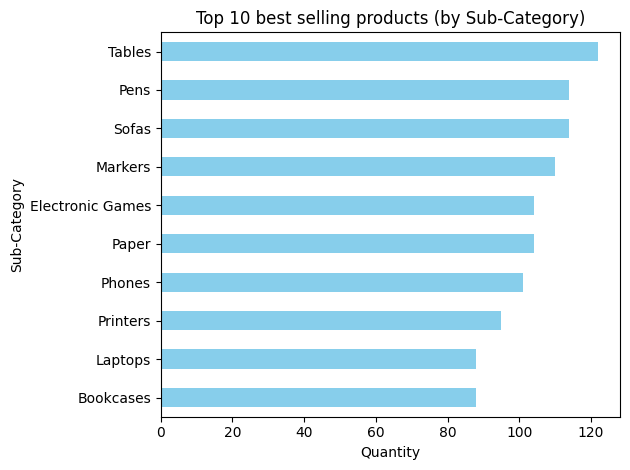

In [14]:
import matplotlib.pyplot as plt

# 1. Conta os 10 subtipos de produto mais vendidos
produtos_mais_vendidos = df['Sub-Category'].value_counts().head(10)

# 2. Cria o gráfico
produtos_mais_vendidos.plot(kind='barh', color='skyblue')

# 3. Estética do gráfico
plt.title('Top 10 best selling products (by Sub-Category)')
plt.xlabel('Quantity')
plt.ylabel('Sub-Category')
plt.gca().invert_yaxis()  # Coloca o mais vendido no topo
plt.tight_layout()
plt.show()


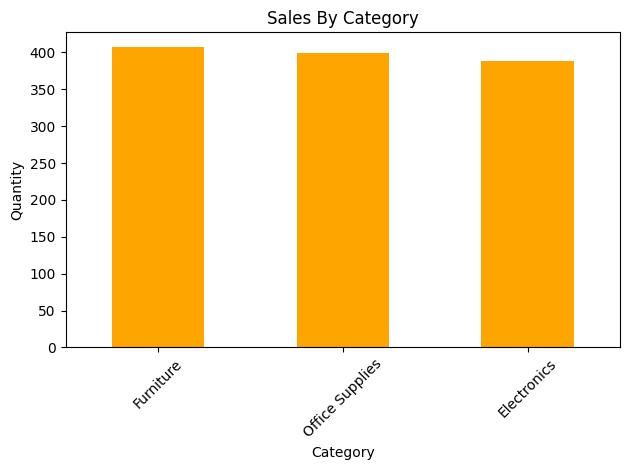

In [13]:
df['Category'].value_counts().plot(kind='bar', color='orange')
plt.title('Sales By Category')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [21]:

# Agrupando os dados
grouped = df.groupby('Category')['Sub-Category'].unique()

# Mostra de forma mais legível
for categoria, subcategorias in grouped.items():
    print(f"\n{categoria}:")
    for item in subcategorias:
        print(f" - {item}")

# Importa o Plotly e plota o gráfico
import plotly.express as px

fig = px.sunburst(
    df,
    path=['Category', 'Sub-Category'],  # corrigido aqui
    values='Quantity',
    color='Category',
    title='Category and Sub-Categories'
)

fig.show()


Electronics:
 - Electronic Games
 - Printers
 - Laptops
 - Phones

Furniture:
 - Tables
 - Chairs
 - Sofas
 - Bookcases

Office Supplies:
 - Pens
 - Markers
 - Paper
 - Binders


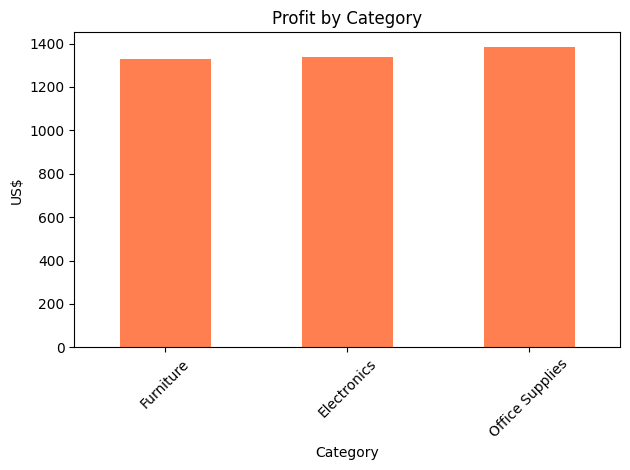

In [65]:

media_categoria1 = df.groupby('Category')['Profit'].mean().sort_values()
media_categoria1.plot(kind='bar', color='coral')
plt.title('Profit by Category')
plt.ylabel('US$')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

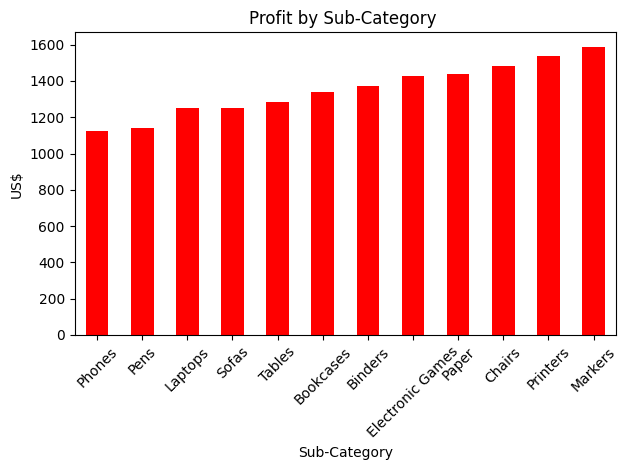

In [54]:

media_categoria = df.groupby('Sub-Category')['Profit'].mean().sort_values()
media_categoria.plot(kind='bar', color='red')
plt.title('Profit by Sub-Category ')
plt.ylabel('US$')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [28]:

# 🧮 Agrupando por categoria e produto (sub-category)
grouped_prod = df.groupby(['Category', 'Sub-Category'])['Quantity'].sum().reset_index()

# 🥇 Selecionando o produto mais vendido por categoria
top_products = grouped_prod.loc[grouped_prod.groupby('Category')['Quantity'].idxmax()]

# 📊 Gráfico
fig = px.bar(
    top_products,
    x='Category',
    y='Quantity',
    color='Sub-Category',
    text='Sub-Category',
    title='Best Selling Product by Category',
)
fig.update_traces(textposition='outside')
fig.update_layout(xaxis_title='Category', yaxis_title='Quantity')
fig.show()


In [45]:
# Agrupar vendas por mês
monthly_sales = df.groupby('Year-Month')['Amount'].sum().reset_index()

# Encontrar o mês com maior volume de vendas
max_month = monthly_sales.loc[monthly_sales['Amount'].idxmax()]

# Exibir resultado
print("📅 Mês com maior volume de vendas:")
print(f"- Mês: {max_month['Year-Month']}")
print(f"- Total vendido: R${max_month['Amount']:.2f}")


📅 Mês com maior volume de vendas:
- Mês: 2022-12
- Total vendido: R$204413.00


In [49]:
# Filtrar apenas o mês de dezembro de 2022
dezembro_2022 = df[df['Year-Month'] == '2022-12']

# Agrupar por produto (Sub-Category) e somar as quantidades
vendas_dez_2022 = dezembro_2022.groupby('Sub-Category')['Quantity'].sum().reset_index()

# Encontrar o produto mais vendido
produto_top = vendas_dez_2022.loc[vendas_dez_2022['Quantity'].idxmax()]

# Exibir resultado
print("📦 Produto mais vendido em Dezembro de 2022:")
print(f"- Produto: {produto_top['Sub-Category']}")
print(f"- Quantidade vendida: {produto_top['Quantity']}")


📦 Produto mais vendido em Dezembro de 2022:
- Produto: Sofas
- Quantidade vendida: 98


In [74]:
import os
with pd.ExcelWriter('max_month.xlsx', engine='openpyxl', mode='a' if os.path.exists('max_month.xlsx') else 'w') as writer:
    max_month.to_excel(writer, sheet_name='max_month', index=False)

    import os
with pd.ExcelWriter('produto_top.xlsx', engine='openpyxl', mode='a' if os.path.exists('produto_top.xlsx') else 'w') as writer:
    produto_top.to_excel(writer, sheet_name='produto_top', index=False)

In [50]:
# Agrupar vendas por cidade
city_sales = df.groupby('City')['Amount'].sum().reset_index()

# Encontrar a cidade com maior volume de vendas
top_city = city_sales.loc[city_sales['Amount'].idxmax()]

# Exibir resultado
print("\n🏙️ Cidade com maior volume de vendas no período:")
print(f"- Cidade: {top_city['City']}")
print(f"- Total vendido: R${top_city['Amount']:.2f}")



🏙️ Cidade com maior volume de vendas no período:
- Cidade: Orlando
- Total vendido: R$452158.00
